In [1]:
#!g2.1
%load_ext autoreload
%autoreload 2

In [2]:
#!g2.1
%pip install wandb piq

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for urllib3<1.27,>=1.21.1 from https://files.pythonhosted.org/packages/b0/53/aa91e163dcfd1e5b82d8a890ecf13314e3e149c05270cc644581f77f17fd/urllib3-1.26.18-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 2.2 MB/s eta 0:00:00 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ml-kernel 0.0.1 requires requests==2.31.0, but you have requests 2.27.1 which is incompatible.
ml-kernel 0.0.1 requires urllib3==1.25.11, but you have urllib3 1.26.18 which is incompatible.

[notice] A new release of pip is available: 23.2.1 ->

In [3]:
#!g2.1
%cd mygan

/home/jupyter/work/resources/mygan


In [4]:
#!g2.1
import torch
SEED = 42
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.benchmark = True

In [5]:
#!g2.1
import torchvision.datasets as datasets
import torchvision.transforms as transforms

dataset = datasets.ImageFolder(root="data/cat/",
                               transform=transforms.Compose([
                                   transforms.Resize(64),
                                   transforms.CenterCrop(64),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                               ]))

loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True, num_workers=0)

In [6]:
#!g2.1
import wandb
wandb.login(key='67d3c077c0b4327f7734330abc8ede91d268977f', relogin=True)
run_i = 12

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/jupyter/.netrc


In [7]:
#!g2.1
from mygan.model import Generator, Discriminator

gen = Generator().to('cuda')
dis = Discriminator().to('cuda')
gen_optim = torch.optim.AdamW(gen.parameters(), lr=1e-4)
dis_optim = torch.optim.AdamW(dis.parameters(), lr=1e-4)

# wandb.finish()

In [8]:
#!g2.1

wandb.init(project='mygan', name=f'run_{run_i}', reinit=True)
run_i += 1

wandb: Currently logged in as: mkairov. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.16.1
wandb: Run data is saved locally in /home/jupyter/work/resources/mygan/wandb/run-20231218_194502-l41xbhm1
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run run_12
wandb: ⭐️ View project at https://wandb.ai/mkairov/mygan
wandb: 🚀 View run at https://wandb.ai/mkairov/mygan/runs/l41xbhm1


In [9]:
#!g2.1
from mygan.train import train

train(gen, dis, gen_optim, dis_optim, loader, 300)

  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 0. Loss: G=9.23504, D=0.02356



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 1. Loss: G=6.20202, D=0.02446



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 2. Loss: G=7.67608, D=0.03590



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 3. Loss: G=6.52364, D=0.02910



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 4. Loss: G=6.42371, D=0.04929



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 5. Loss: G=8.16718, D=0.00542



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 6. Loss: G=10.49039, D=0.09098



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 7. Loss: G=7.37073, D=0.06585



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 8. Loss: G=7.26218, D=0.01728



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 9. Loss: G=6.39653, D=0.09386



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 10. Loss: G=7.62111, D=0.01756



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 11. Loss: G=7.24598, D=0.17796



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 12. Loss: G=7.72134, D=0.08076



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 13. Loss: G=7.46704, D=0.09465



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 14. Loss: G=6.57033, D=0.11340



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 15. Loss: G=6.52281, D=0.02575



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 16. Loss: G=16.65783, D=0.00204



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 17. Loss: G=10.30917, D=0.00062



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 18. Loss: G=10.35901, D=0.00907



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 19. Loss: G=8.18052, D=0.05235



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 20. Loss: G=6.98097, D=0.01126



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 21. Loss: G=6.28981, D=0.23346



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 22. Loss: G=6.93609, D=0.04191



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 23. Loss: G=7.49210, D=0.00702



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 24. Loss: G=7.72783, D=0.00473



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 25. Loss: G=8.73002, D=0.06760



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 26. Loss: G=11.11637, D=0.00044



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 27. Loss: G=6.01162, D=0.01071



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 28. Loss: G=7.54042, D=0.13796



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 29. Loss: G=15.79018, D=0.00056



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 30. Loss: G=8.47911, D=0.08560



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 31. Loss: G=6.69028, D=0.00699



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 32. Loss: G=10.53821, D=0.18186



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 33. Loss: G=11.48185, D=0.00042



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 34. Loss: G=10.66000, D=0.01100



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 35. Loss: G=5.13568, D=0.01533



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 36. Loss: G=5.09753, D=0.05366



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 37. Loss: G=7.80735, D=0.13108



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 38. Loss: G=7.07702, D=0.13836



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 39. Loss: G=11.58785, D=0.17491



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 40. Loss: G=8.74274, D=0.00136



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 41. Loss: G=8.70220, D=0.02806



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 42. Loss: G=11.30363, D=0.00371



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 43. Loss: G=5.93847, D=0.11294



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 44. Loss: G=6.53189, D=0.09247



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 45. Loss: G=12.26743, D=0.00186



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 46. Loss: G=11.86858, D=0.13031



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 47. Loss: G=8.21188, D=0.01568



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 48. Loss: G=7.07036, D=0.04334



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 49. Loss: G=5.65446, D=0.09665



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 50. Loss: G=9.19736, D=0.01882



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 51. Loss: G=5.80110, D=0.04944



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 52. Loss: G=4.78954, D=0.03707



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 53. Loss: G=7.13666, D=0.04219



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 54. Loss: G=7.11423, D=0.00762



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 55. Loss: G=6.31149, D=0.02381



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 56. Loss: G=11.34879, D=0.01536



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 57. Loss: G=9.55338, D=0.30078



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 58. Loss: G=8.43051, D=0.08396



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 59. Loss: G=8.57460, D=0.00813



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 60. Loss: G=6.61292, D=0.08551



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 61. Loss: G=7.80644, D=0.00316



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 62. Loss: G=6.01187, D=0.02200



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 63. Loss: G=7.37928, D=0.01144



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 64. Loss: G=7.70502, D=0.03018



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 65. Loss: G=8.15739, D=0.00217



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 66. Loss: G=6.86250, D=0.23309



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 67. Loss: G=8.78838, D=0.00152



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 68. Loss: G=10.85942, D=0.21516



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 69. Loss: G=9.17983, D=0.00595



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 70. Loss: G=7.93882, D=0.00734



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 71. Loss: G=6.74030, D=0.71115



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 72. Loss: G=5.53029, D=0.04764



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 73. Loss: G=3.43269, D=0.12150



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 74. Loss: G=5.48305, D=0.17670



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 75. Loss: G=10.31145, D=0.00278



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 76. Loss: G=10.03693, D=0.00340



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 77. Loss: G=6.25643, D=0.48551



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 78. Loss: G=6.53313, D=0.02752



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 79. Loss: G=6.41717, D=0.03737



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 80. Loss: G=5.76457, D=0.02164



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 81. Loss: G=6.23845, D=0.03395



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 82. Loss: G=8.33733, D=0.18343



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 83. Loss: G=8.16344, D=0.02556



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 84. Loss: G=8.13138, D=0.14798



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 85. Loss: G=9.23050, D=0.03144



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 86. Loss: G=6.76597, D=0.01676



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 87. Loss: G=6.56188, D=0.03865



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 88. Loss: G=5.46571, D=0.08473



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 89. Loss: G=8.03374, D=0.00987



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 90. Loss: G=15.64058, D=0.26684



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 91. Loss: G=5.68623, D=0.10137



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 92. Loss: G=6.16964, D=0.09781



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 93. Loss: G=8.30920, D=0.00223



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 94. Loss: G=11.44320, D=0.00404



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 95. Loss: G=7.34644, D=0.01119



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 96. Loss: G=10.27730, D=0.00272



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 97. Loss: G=8.35132, D=0.00436



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 98. Loss: G=6.83783, D=0.03635



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 99. Loss: G=7.23908, D=0.01179



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 100. Loss: G=6.39655, D=0.11278



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 101. Loss: G=6.02752, D=0.07966



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 102. Loss: G=10.63371, D=0.00110



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 103. Loss: G=11.92500, D=0.05480



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 104. Loss: G=5.39799, D=0.02176



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 105. Loss: G=8.08199, D=0.25298



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 106. Loss: G=5.76113, D=0.05784



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 107. Loss: G=5.77110, D=0.07546



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 108. Loss: G=5.05002, D=0.13471



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 109. Loss: G=3.66989, D=0.80205



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 110. Loss: G=5.27873, D=0.05571



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 111. Loss: G=8.63053, D=0.00598



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 112. Loss: G=7.69169, D=0.06428



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 113. Loss: G=9.92500, D=0.13685



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 114. Loss: G=6.78633, D=0.01686



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 115. Loss: G=6.47286, D=0.01253



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 116. Loss: G=10.12934, D=0.00918



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 117. Loss: G=5.14005, D=0.14432



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 118. Loss: G=6.46906, D=0.07181



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 119. Loss: G=6.86269, D=0.01170



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 120. Loss: G=4.76166, D=0.06101



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 121. Loss: G=8.70242, D=0.01519



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 122. Loss: G=7.33828, D=0.02346



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 123. Loss: G=6.71350, D=0.02948



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 124. Loss: G=8.22126, D=0.02847



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 125. Loss: G=8.64176, D=0.00853



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 126. Loss: G=4.76427, D=0.08358



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 127. Loss: G=9.10431, D=0.13264



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 128. Loss: G=5.64229, D=0.09271



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 129. Loss: G=14.12384, D=0.00034



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 130. Loss: G=6.62085, D=0.05728



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 131. Loss: G=5.42397, D=0.41025



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 132. Loss: G=9.63851, D=0.05098



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 133. Loss: G=6.86889, D=0.04274



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 134. Loss: G=8.30403, D=0.03035



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 135. Loss: G=12.01156, D=0.00211



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 136. Loss: G=8.36835, D=0.00159



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 137. Loss: G=6.50523, D=0.27439



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 138. Loss: G=6.94066, D=0.01705



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 139. Loss: G=6.54213, D=0.05035



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 140. Loss: G=5.71003, D=0.03147



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 141. Loss: G=5.41428, D=0.13729



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 142. Loss: G=11.05798, D=0.00573



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 143. Loss: G=8.63034, D=0.00345



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 144. Loss: G=8.69645, D=0.11417



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 145. Loss: G=7.65529, D=0.06402



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 146. Loss: G=6.36375, D=0.01305



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 147. Loss: G=8.50010, D=0.02111



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 148. Loss: G=8.13835, D=0.06996



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 149. Loss: G=7.63510, D=0.06231



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 150. Loss: G=10.83928, D=0.10166



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 151. Loss: G=8.74070, D=0.00241



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 152. Loss: G=5.82472, D=0.06814



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 153. Loss: G=6.60444, D=0.08260



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 154. Loss: G=7.60975, D=0.01006



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 155. Loss: G=8.67951, D=0.01480



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 156. Loss: G=8.13737, D=0.03355



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 157. Loss: G=8.61774, D=0.01253



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 158. Loss: G=8.83034, D=0.04485



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 159. Loss: G=4.33558, D=0.04126



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 160. Loss: G=9.90442, D=0.00779



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 161. Loss: G=10.21796, D=0.00169



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 162. Loss: G=10.12519, D=0.02202



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 163. Loss: G=6.79722, D=0.04625



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 164. Loss: G=11.14293, D=0.02449



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 165. Loss: G=6.23386, D=0.15625



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 166. Loss: G=10.09385, D=0.00354



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 167. Loss: G=5.94215, D=0.06133



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 168. Loss: G=4.46133, D=0.28686



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 169. Loss: G=10.98486, D=0.00415



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 170. Loss: G=6.76394, D=0.04330



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 171. Loss: G=6.08616, D=0.08478



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 172. Loss: G=5.96246, D=0.03768



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 173. Loss: G=6.04592, D=0.21941



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 174. Loss: G=6.43279, D=0.06536



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 175. Loss: G=7.93268, D=0.02727



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 176. Loss: G=7.20856, D=0.02653



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 177. Loss: G=6.08538, D=0.05046



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 178. Loss: G=12.87638, D=0.00145



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 179. Loss: G=11.39482, D=0.08706



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 180. Loss: G=10.89813, D=0.04472



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 181. Loss: G=5.94189, D=0.14918



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 182. Loss: G=6.53318, D=0.04236



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 183. Loss: G=12.55295, D=0.00594



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 184. Loss: G=9.10554, D=0.05391



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 185. Loss: G=6.18256, D=0.16888



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 186. Loss: G=7.39914, D=0.00820



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 187. Loss: G=7.43267, D=0.01601



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 188. Loss: G=5.05336, D=0.02318



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 189. Loss: G=9.39607, D=0.02307



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 190. Loss: G=9.49241, D=0.00601



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 191. Loss: G=6.46399, D=0.04777



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 192. Loss: G=6.56765, D=0.00951



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 193. Loss: G=6.36776, D=0.01654



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 194. Loss: G=7.68168, D=0.32246



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 195. Loss: G=5.57506, D=0.04885



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 196. Loss: G=7.98855, D=0.01195



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 197. Loss: G=14.08209, D=0.02533



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 198. Loss: G=4.72651, D=0.02227



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 199. Loss: G=10.67252, D=1.00245



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 200. Loss: G=8.33846, D=0.02553



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 201. Loss: G=7.65859, D=0.02017



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 202. Loss: G=5.48690, D=0.22534



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 203. Loss: G=8.37782, D=0.16123



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 204. Loss: G=8.36419, D=0.02735



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 205. Loss: G=7.76927, D=0.04024



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 206. Loss: G=6.95225, D=0.06414



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 207. Loss: G=6.78291, D=0.05915



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 208. Loss: G=9.11104, D=0.00203



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 209. Loss: G=5.28847, D=0.17492



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 210. Loss: G=7.72790, D=0.02931



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 211. Loss: G=9.41110, D=0.00238



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 212. Loss: G=9.20089, D=0.27241



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 213. Loss: G=7.25081, D=0.02036



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 214. Loss: G=11.50395, D=0.01535



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 215. Loss: G=9.85039, D=0.00730



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 216. Loss: G=8.12161, D=0.00605



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 217. Loss: G=6.68159, D=0.00615



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 218. Loss: G=5.47536, D=0.05927



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 219. Loss: G=10.55901, D=0.89275



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 220. Loss: G=11.33379, D=0.08391



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 221. Loss: G=10.69490, D=0.00271



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 222. Loss: G=10.74585, D=0.00666



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 223. Loss: G=6.64216, D=0.01376



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 224. Loss: G=10.66977, D=0.05169



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 225. Loss: G=10.04504, D=0.00462



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 226. Loss: G=7.80858, D=0.01744



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 227. Loss: G=6.96261, D=0.01656



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 228. Loss: G=9.09356, D=0.01475



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 229. Loss: G=7.69138, D=0.01802



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 230. Loss: G=6.92835, D=0.03231



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 231. Loss: G=6.13535, D=0.18951



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 232. Loss: G=6.38543, D=0.05297



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 233. Loss: G=7.12047, D=0.06954



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 234. Loss: G=2.44241, D=0.13719



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 235. Loss: G=11.38194, D=0.00189



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 236. Loss: G=7.94270, D=0.01224



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 237. Loss: G=9.67308, D=0.00621



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 238. Loss: G=3.15132, D=0.49516



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 239. Loss: G=7.03266, D=0.02479



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 240. Loss: G=6.90255, D=0.30127



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 241. Loss: G=6.57109, D=0.02466



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 242. Loss: G=5.67299, D=0.20178



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 243. Loss: G=9.18978, D=0.02087



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 244. Loss: G=7.43568, D=0.00968



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 245. Loss: G=7.44605, D=0.09720



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 246. Loss: G=5.69119, D=0.67483



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 247. Loss: G=6.50271, D=0.20738



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 248. Loss: G=7.38026, D=0.13747



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 249. Loss: G=7.61265, D=0.00878



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 250. Loss: G=6.64754, D=0.10518



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 251. Loss: G=4.91882, D=0.89608



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 252. Loss: G=10.67069, D=0.05599



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 253. Loss: G=8.76571, D=0.12403



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 254. Loss: G=7.46882, D=0.07801



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 255. Loss: G=8.96808, D=0.02980



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 256. Loss: G=6.74462, D=0.02586



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 257. Loss: G=9.20877, D=0.00649



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 258. Loss: G=6.68119, D=0.20424



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 259. Loss: G=8.02208, D=0.38538



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 260. Loss: G=5.27139, D=0.08848



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 261. Loss: G=10.61954, D=0.02653



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 262. Loss: G=5.51526, D=0.05590



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 263. Loss: G=6.88739, D=0.01490



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 264. Loss: G=6.34383, D=0.01496



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 265. Loss: G=6.22726, D=0.04574



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 266. Loss: G=5.50735, D=0.25786



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 267. Loss: G=8.31611, D=0.06358



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 268. Loss: G=5.93386, D=0.21417



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 269. Loss: G=5.79953, D=0.03064



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 270. Loss: G=7.49215, D=0.02059



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 271. Loss: G=6.23691, D=0.15744



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 272. Loss: G=3.24033, D=0.43330



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 273. Loss: G=7.07812, D=0.06342



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 274. Loss: G=6.02701, D=0.04371



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 275. Loss: G=7.23496, D=0.19828



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 276. Loss: G=7.85561, D=0.03295



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 277. Loss: G=6.74400, D=0.30374



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 278. Loss: G=7.56295, D=0.00687



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 279. Loss: G=7.31913, D=0.12058



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 280. Loss: G=7.76981, D=0.02113



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 281. Loss: G=6.44502, D=0.02106



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 282. Loss: G=7.88399, D=0.00632



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 283. Loss: G=6.06034, D=0.00842



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 284. Loss: G=7.83151, D=0.01001



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 285. Loss: G=8.66398, D=0.00369



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 286. Loss: G=8.32313, D=0.00266



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 287. Loss: G=11.28190, D=0.00347



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 288. Loss: G=11.04692, D=0.05404



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 289. Loss: G=8.54117, D=0.00266



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 290. Loss: G=7.27586, D=0.17335



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 291. Loss: G=7.36802, D=0.05187



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 292. Loss: G=9.40812, D=1.11274



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 293. Loss: G=6.47760, D=0.00643



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 294. Loss: G=7.31278, D=0.08423



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 295. Loss: G=7.12333, D=0.02992



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 296. Loss: G=5.78776, D=0.03501



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 297. Loss: G=6.74190, D=0.02895



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 298. Loss: G=6.78707, D=0.07045



  0%|          | 0/114 [00:00<?, ?it/s]

EPOCH 299. Loss: G=9.42073, D=1.70722



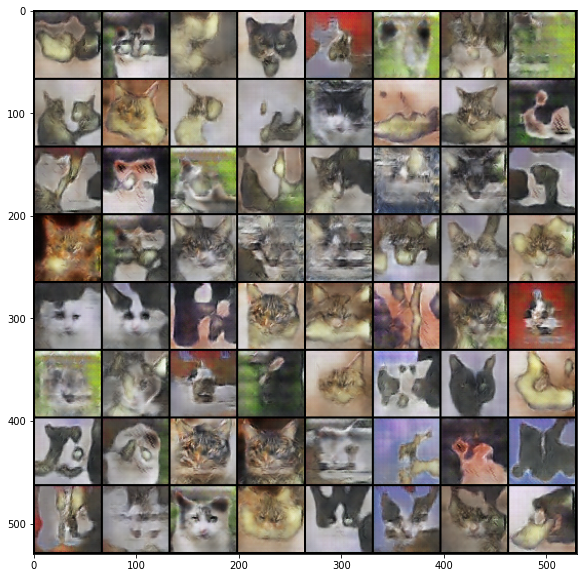

In [10]:
#!g2.1
import torch
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np

fixed_noise = torch.randn(64, gen.nz, 1, 1, device='cuda')
with torch.no_grad():
    fake = gen(fixed_noise).detach().cpu()


fig = plt.figure(figsize=(10,10))
plt.imshow(np.transpose(vutils.make_grid(fake, padding=2, normalize=True), (1,2,0)), animated=True)

In [11]:
#!g2.1
from mygan.train import evaluate

fid, ssim = evaluate(gen, loader)
print(f'FID: {fid}, SSIMLoss: {ssim}')

FID: 214.3175212888725, SSIMLoss: 0.9028998017311096


In [ ]:
#!g2.1
